# Practical 1: Introduction to probabilistic methods and Monte Carlo simulations
_2024-2025 - Tribel Pascal_

In this first practical work, you will become familiar with the fundamental concepts of probabilistic methods and Monte Carlo simulations, using Python and its standard libraries for mathematical and graphical manipulation.

## Necessary libraries

To run this practical work, the following libraries must be installed:
- `NumPy`: Vector and matrix manipulation, random number generation,
- `SciPy`: For advanced numerical statistical methods,
- `Pandas`: For advanced data manipulation
- `Matplotlib`, `seaborn`: For data visualization,
- `tqdm`: For beautiful loading bars.

If you are using Jupyter Notebook, you can install the dependencies directly by running the cell below:

In [1]:
!pip install numpy matplotlib tqdm pandas seaborn

If the libraries are already installed, you can skip this step.

## 1. Introduction to `NumPy`
`NumPy` is an essential library for scientific computations in Python. It offers:
- `ndarray` objects to represent multi-dimensional arrays.
- A collection of mathematical functions to perform fast operations on these arrays.

### Manipulation of `NumPy` arrays
Here are some examples for creating and manipulating `NumPy` arrays:

In [2]:
import numpy as np

## Example of creation of arrays

In [3]:
v0 = np.array([1, 2, 3])
v1 = np.arange(0, 3, 0.2)
v2 = np.linspace(0, 5, 10)
v3 = np.linspace(0, 2, 10)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(v0)
print(v1)
print(v2)
print(v3)
print(M)

[1 2 3]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Basic operations

In [4]:
s = np.sum(v0)
m = np.mean(M)
p = np.dot(v2, v3)
print("Sum of v0 components:", s)
print("Average value in M:", m)
print("Scalar product of v2 and v3:", p)

Sum of v0 components: 6
Average value in M: 5.0
Scalar product of v2 and v3: 35.18518518518518


We encourage you to consult the official `NumPy` documentation to explore its many features: _https://numpy.org/doc/stable/_.
A larger introduction to `NumPy` and `MatPlotLib` is available in the $5^{\text{th}}$ practical of the course INFO-F305 - Modélisation et Simulation.

## 2. Introduction to the `numpy.random` module
The `NumPy` library includes a `numpy.random` submodule dedicated to random number generation. This module offers:
- Random number generators for various distributions (uniform, normal, binomial, etc.).
- Tools for drawing samples and manipulating random sequences.

### Reproducibility of results
To ensure the reproducibility of simulations, it is crucial to set a random seed.

Example:

In [5]:
np.random.seed(42)
values = np.random.rand(5)
print(values)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


### Available distributions
Here are some common distributions:
- `numpy.random.uniform(low, high, size)` : Uniform distribution.
- `numpy.random.normal(loc, scale, size)` : Normal (Gaussian) distribution.
- `numpy.random.binomial(n, p, size)` : Binomial distribution.

### Sampling
Sampling is the process of randomly selecting elements from a population. For example:

In [6]:
population = np.array([1, 2, 3, 4, 5])
sample = np.random.choice(population, size=(3, 3), replace=True)
print(sample)

[[3 3 3]
 [5 4 3]
 [5 2 4]]


# 3. Monte Carlo Simulation
Monte Carlo simulations are a class of numerical techniques based on the random generation of samples to solve mathematical or physical problems. They are particularly useful for:
- Estimating complex integrals.
- Solving problems in statistical physics.
- Analyzing complex probabilistic systems.

In [7]:
import matplotlib.pyplot as plt

# 4. Exercises
1. Reproduce the estimation of $\pi$ with different numbers of points and plot the evolution of the estimation according to the number of sampled points. How does the seed affect the estimation ?
2. Implement a Monte Carlo simulation to estimate the integral of the function $f(x) = x^2$ over the interval $[0, 1]$.
3. Use a normal distribution to model a random variable, with parameters $\mu = 0$ and $\sigma = \frac12$ and calculate the probability that it takes a value in the interval $[-0.25, 0.25]$.

In [8]:
from tqdm.auto import tqdm

### Exercise 1: $\pi$ estimation

In [9]:
max_n_points = 10000
approximations = []
distances = []
for n_points in tqdm(range(max_n_points)):
    point = np.random.rand(2)
    distances.append(np.sqrt(point[0]**2 + point[1]**2))
    inside_circle = np.array(distances) <= 1
    approximations.append(4 * np.sum(inside_circle) / (n_points+1))

  0%|          | 0/10000 [00:00<?, ?it/s]

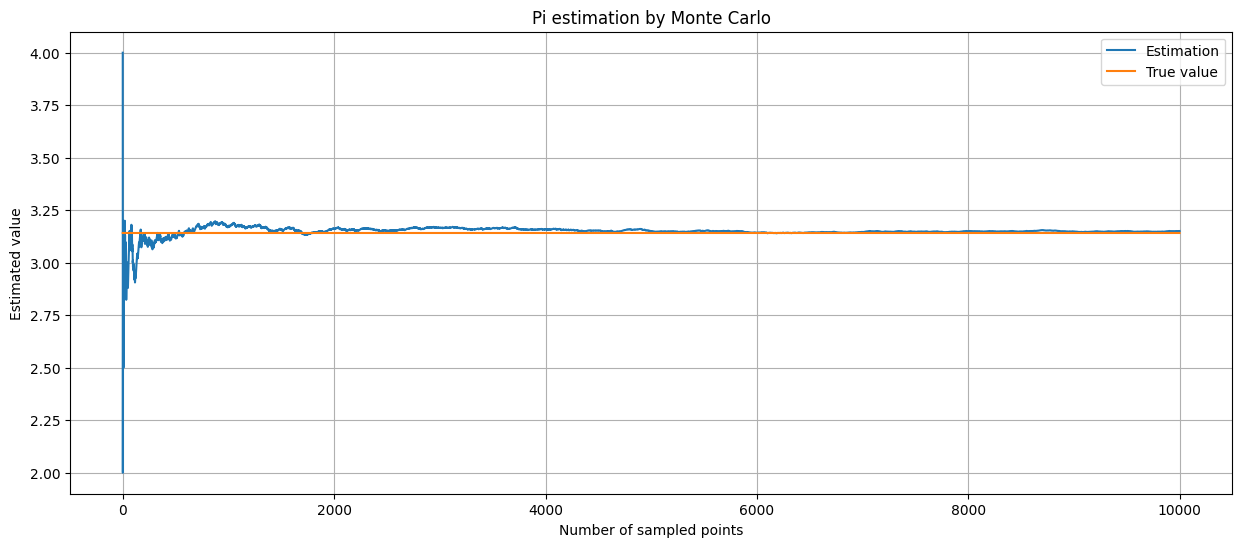

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(approximations, label="Estimation")
plt.plot([np.pi for _ in range(max_n_points)], label="True value")
plt.xlabel("Number of sampled points")
plt.ylabel("Estimated value")
plt.title("Pi estimation by Monte Carlo")
plt.grid()
plt.legend()
plt.show()

### Exercise 2: Integral estimation
The indefinite integral is given by
$$\int x^2 \,dx = \frac{x^3}{3}$$
and therefore the definite interval is
$$\int_{0}^{1} x^2 \,dx = \frac{1^3}{3} - \frac{0^3}{3} = \frac13$$

In [11]:
n_points = 10000
approximations = []
points = np.random.rand(n_points, 2)
under_curve = np.array(points[:, 1]) <= np.array(points[:, 0])**2
estimation = np.sum(under_curve) / n_points
print(estimation)

0.3369


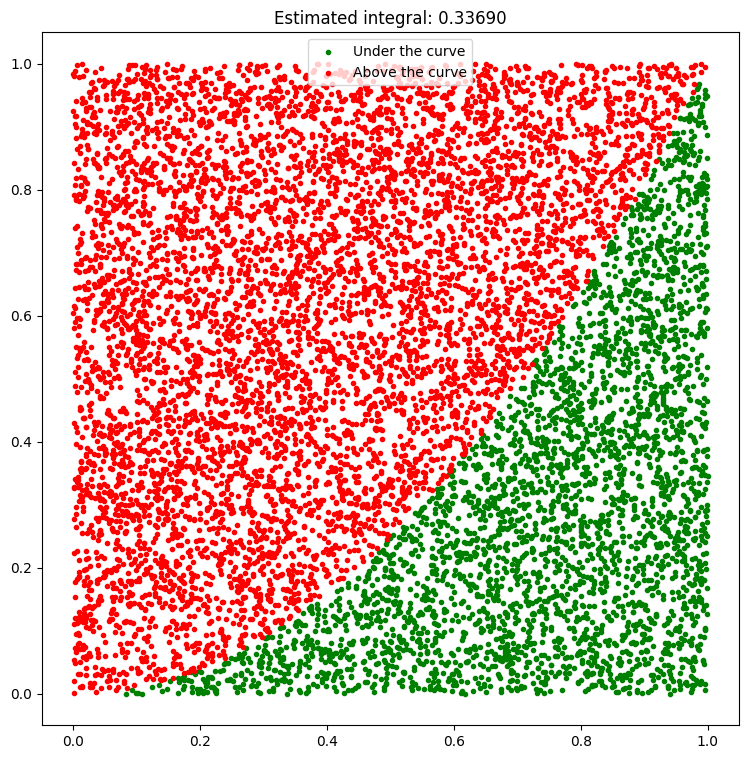

In [12]:
plt.figure(figsize=(9, 9))
plt.scatter(points[under_curve, 0], points[under_curve, 1], color='green', marker='.', label='Under the curve')
plt.scatter(points[~under_curve, 0], points[~under_curve, 1], color='red', marker='.', label='Above the curve')
plt.title(f'Estimated integral: {estimation:.5f}')
plt.legend()
plt.show()

### Exercice 3
Let us first show how to analytically compute the requested probablity.
The probability that $X$ lies within the interval is given by:
$$P(-0.25 \leq X \leq 0.25) = \int_{-0.25}^{0.25} f_X(x) \, dx$$
where the Probability Density Function $f_X(x)$ is:
$$f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$
In our case, $\mu = 0$ and $\sigma^2 = 1/2$, so:
$$f_X(x) = \frac{1}{\sqrt{\pi}} e^{-2x^2}$$
To simplify the calculation, we convert $X$ to the standard normal variable $Z$:
$$Z = \frac{X - \mu}{\sigma}, \quad \text{where } \sigma = \sqrt{1/2} = \frac{\sqrt{2}}{2}$$
For the bounds of the interval:
$$z_{-0.25} = \frac{-0.25 - 0}{\sigma} = -0.25 \cdot \frac{2}{\sqrt{2}} = -\frac{\sqrt{2}}{4}, \quad
z_{0.25} = \frac{0.25 - 0}{\sigma} = \frac{\sqrt{2}}{4}$$
The probability is then expressed using the repartition function $\Phi(z)$ of the standard normal distribution:
$$P(-0.25 \leq X \leq 0.25) = P\left(-\frac{\sqrt{2}}{4} \leq Z \leq \frac{\sqrt{2}}{4}\right) = \Phi\left(\frac{\sqrt{2}}{4}\right) - \Phi\left(-\frac{\sqrt{2}}{4}\right)$$
Using the symmetry of the standard normal distribution:
$$\Phi(-z) = 1 - \Phi(z)$$
This simplifies to:
$$P(-0.25 \leq X \leq 0.25) = 2 \cdot \Phi\left(\frac{\sqrt{2}}{4}\right) - 1$$
To find $\Phi\left(\frac{\sqrt{2}}{4}\right)$, we can use values in tables. It yields:
$$\frac{\sqrt{2}}{4} \approx 0.3536$$
From standard normal tables or software (we can use `SciPy`):

In [13]:
import scipy

In [14]:
scipy.stats.norm.cdf((2**0.5)/4)

0.6381631950841185

$$\Phi(0.3536) \approx 0.6388$$

Thus:
$$P(-0.25 \leq X \leq 0.25)$$ is given by

In [15]:
2*scipy.stats.norm.cdf((2**0.5)/4)-1

0.2763263901682369

The Monte Carlo simulation yields a pretty close value:

In [16]:
n_points = 10000
approximations = []
points = np.random.normal(0, 0.5**0.5, size=(n_points,))
in_interval = (np.abs(np.array(points)) <= 0.25)
estimation = np.sum(in_interval) / n_points
print(estimation)

0.2774


### Exercice 4: Monte Carlo approximation of parameters

Use Monte Carlo simulation to approximate numerically the mean of a Normal r.v. ${\mathbf z} \sim N(\mu,\sigma^2)$ and of the variable ${\mathbf y}= {\mathbf z}^2$. Verify that MC returns a good approximation of the analytical result.
As a hint, note that $$\mbox{Var}[{\mathbf z}]=E[{\mathbf z}^2]-E[{\mathbf z}]^2$$

In [17]:
from scipy import stats

R = 100000 

Ez = 0.5 ## mu
Vz = 1.7 ## sigma^2
z = np.random.normal(Ez, np.sqrt(Vz), R)
y = z**2

print(f"E[z]={Ez}; MC est E[z] ={np.mean(z)}")

print(f"Var[z]={Vz}; MC est Var[z] ={np.var(z)}")

print(f"E[z^2]={Vz+Ez**2}; MC est E[y=z^2] ={np.mean(y)}")

E[z]=0.5; MC est E[z] =0.5051121554245153
Var[z]=1.7; MC est Var[z] =1.6969120529160127
E[z^2]=1.95; MC est E[y=z^2] =1.9520503424736118


Use MC to approximate numerically $E[ {\mathbf k}]$ and $\mbox{Var}[ {\mathbf k}]$ where ${\mathbf k} = | {\mathbf z}|$ and check that the approximation is good w.r.t. the analytical results in https://www.quora.com/If-Y-X-where-X-has-normal-distribution-N-0-1-what-is-the-density-function-expectation-and-variance-of-Y.

In [18]:
Ez = 0
Vz = 1
z = np.random.normal(Ez, np.sqrt(Vz), R)
k = np.abs(z)

Ek = np.sqrt(2/np.pi)
Vk = 1 - 2/np.pi

print(f"E[k] = {Ek}; MC estimate E[k=|z|] = {np.mean(k)}")
print(f"V[k] = {Vk}; MC estimate V[k=|z|] = {np.var(k)}")

E[k] = 0.7978845608028654; MC estimate E[k=|z|] = 0.7954655904256847
V[k] = 0.3633802276324186; MC estimate V[k=|z|] = 0.3625336605921777


### Exercise 5
Use MC to approximate numerically the value of $E[f({\mathbf x})]$ and $f(E[{\mathbf x}])$ for a given deterministic function $f$, where ${\mathbf x}$ is a Normal variable.

In [19]:
np.random.seed(0)
R = 10000

def f(x):
    return -x**2

FX = []
X = []

a = 1
b = 1

for r in range(R):
    x = np.random.normal(a, b)
    FX.append(f(x))
    X.append(x)

muX = np.mean(X)

print(f"E[f(x)]= {np.mean(FX)}")
print(f"f(E[x])= {f(muX)}")

E[f(x)]= -1.9387403370701388
f(E[x])= -0.9634723617223414


### Exercise 6
Use MC to approximate numerically the value of the variance $\mbox{Var}[{\mathbf z}]$ where ${\mathbf z} \sim U(a,b)$ is Uniformly distributed . Check that the result is a good approximation of the analytical value.

In [20]:
R = 50000
a = -1.0
b = 1.0
muz = (b + a) / 2

Z = np.zeros(R)
for r in range(R):
    z = np.random.uniform(a, b)
    Z[r] = (z - muz)**2

print(f"Var. th= {(b-a)**2/12:.6f}, MC approximation= {np.mean(Z):.6f}")

Var. th= 0.333333, MC approximation= 0.334044


### Exercise 7
Use MC to approximate the value of the Covariance of ${\mathbf x}$ and ${\mathbf y}=K{\mathbf x}$ and verify that the result is a good approximation of the analytical derivation. Check for different distributions of ${\mathbf x}$.

As a hint, note 
$$\mbox{Cov}({\mathbf x},{\mathbf y})=E[{\mathbf x}{\mathbf y}]-K E[{\mathbf x}]E[{\mathbf x}]=E[K*{\mathbf x}^2]-K(E[{\mathbf x}]^2)=K(\mbox{Var}({\mathbf x})+E[{\mathbf x}]^2)-K (E[{\mathbf x}])^2= K\mbox{Var}({\mathbf x})$$

In [21]:
R = 50000

distr = "uniform"
XY = []
X = []
K = 2

for r in range(R):
    if distr == "uniform":
        a, b = 1, 20
        x = np.random.uniform(a, b)
        VX = 1/12 * (b-a)**2
    else:
        mu, sigma = 1, 1
        x = np.random.normal(mu, sigma**2)
    y = K * x
    XY.append(x * y)
    X.append(x)

print(f"Analytical covariance= {K*VX}")
print(f"MonteCarlo covariance= {np.mean(XY) - K*np.mean(X)**2}")

Analytical covariance= 60.166666666666664
MonteCarlo covariance= 60.455461621858774


### Exercise 8 - Multivariate gaussian data
#### 2D case
Use MC simulation approximate the mean and covairance of 2-dimensional Gaussian random data with the following parameters:

- Mean vector: [2, 3]
- Covariance matrix: [[2, 0.8], [0.8, 1]]
  
Visualize the used data as a scatter plot. Compare the sample mean and the given mean vector.
Hint: use `scipy.stats.multivariate_normal` for generation and numpy to calculate the sample mean, and use `numpy.cov` for covariance estimation. 
Ensure you understand the difference between population and sample covariance.

#### 3D case
Finally, generate 1000 samples of 3-dimensional Gaussian random data with the following parameters:

- Mean vector: [1, 4, 7]
- Covariance matrix:[[3, 1.5, 0.8], [1.5, 2, 0.5], [0.8, 0.5, 1]]

Estimate the covariance matrix using the generated data. Visualize the pairwise scatter plots of the dimensions (use a scatter plot matrix).
Hints: use `pandas.plotting.scatter_matrix` or `seaborn.pairplot` for visualization.
Pay attention to the interpretation of correlations between dimensions.

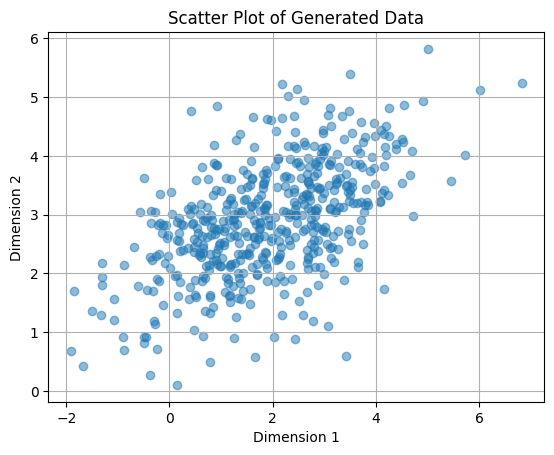

Given mean: [2, 3]
Sample mean: [1.90141183 2.89994642]


In [22]:
from scipy.stats import multivariate_normal as mvn

mean = [2, 3]
cov = [[2, 0.8], [0.8, 1]]
n_samples = 500

data = mvn(mean=mean, cov=cov).rvs(size=n_samples)

sample_mean = np.mean(data, axis=0)

plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title("Scatter Plot of Generated Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

print(f"Given mean: {mean}")
print(f"Sample mean: {sample_mean}")

In [23]:
sample_cov = np.cov(data, rowvar=False)

print(f"Given covariance matrix:\n{np.array(cov)}")
print(f"Estimated covariance matrix:\n{sample_cov}")

Given covariance matrix:
[[2.  0.8]
 [0.8 1. ]]
Estimated covariance matrix:
[[1.95408474 0.73194785]
 [0.73194785 0.92286058]]


Given covariance matrix:
[[3.  1.5 0.8]
 [1.5 2.  0.5]
 [0.8 0.5 1. ]]
Estimated covariance matrix:
[[3.09044869 1.56479156 0.86576548]
 [1.56479156 2.01737524 0.51916702]
 [0.86576548 0.51916702 1.02238754]]


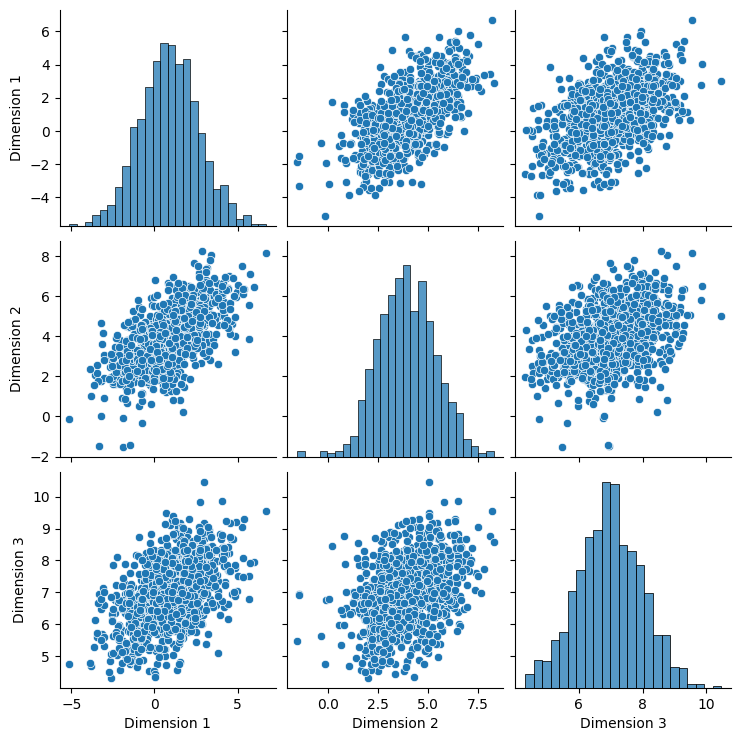

In [24]:
import pandas as pd
import seaborn as sns

mean_3d = [1, 4, 7]
cov_3d = [[3, 1.5, 0.8], 
          [1.5, 2, 0.5], 
          [0.8, 0.5, 1]]

n_samples_3d = 1000

data_3d = mvn(mean=mean_3d, cov=cov_3d).rvs(size=n_samples_3d)

df = pd.DataFrame(data_3d, columns=["Dimension 1", "Dimension 2", "Dimension 3"])

sample_cov_3d = np.cov(data_3d, rowvar=False)

print(f"Given covariance matrix:\n{np.array(cov_3d)}")
print(f"Estimated covariance matrix:\n{sample_cov_3d}")

sns.pairplot(df)
plt.show()